In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal=sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv("D:\Python projects\ML projects\Time Series Dataset\PJME_hourly.csv")
df=df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [4]:
df.head(20)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
2002-12-31 06:00:00,26222.0
2002-12-31 07:00:00,28702.0
2002-12-31 08:00:00,30698.0
2002-12-31 09:00:00,31800.0


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

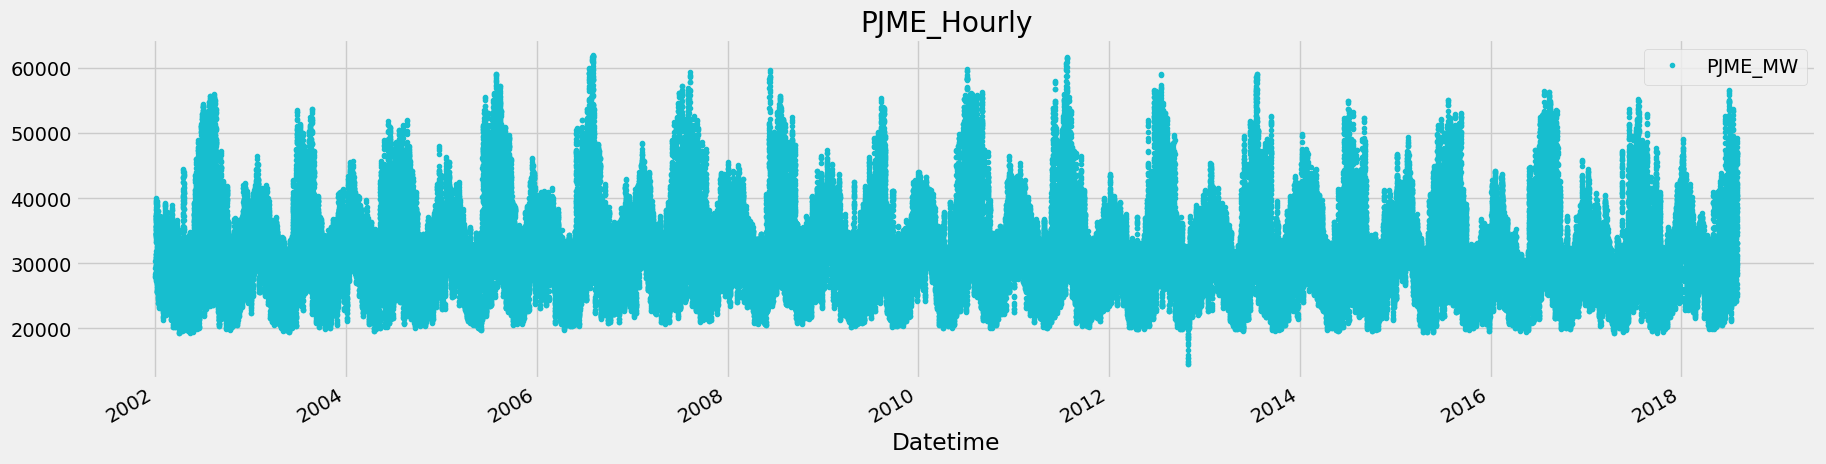

In [6]:
df.plot(style='.', figsize=(20,5), color=color_pal[9], title='PJME_Hourly')
color_pal

In [8]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']


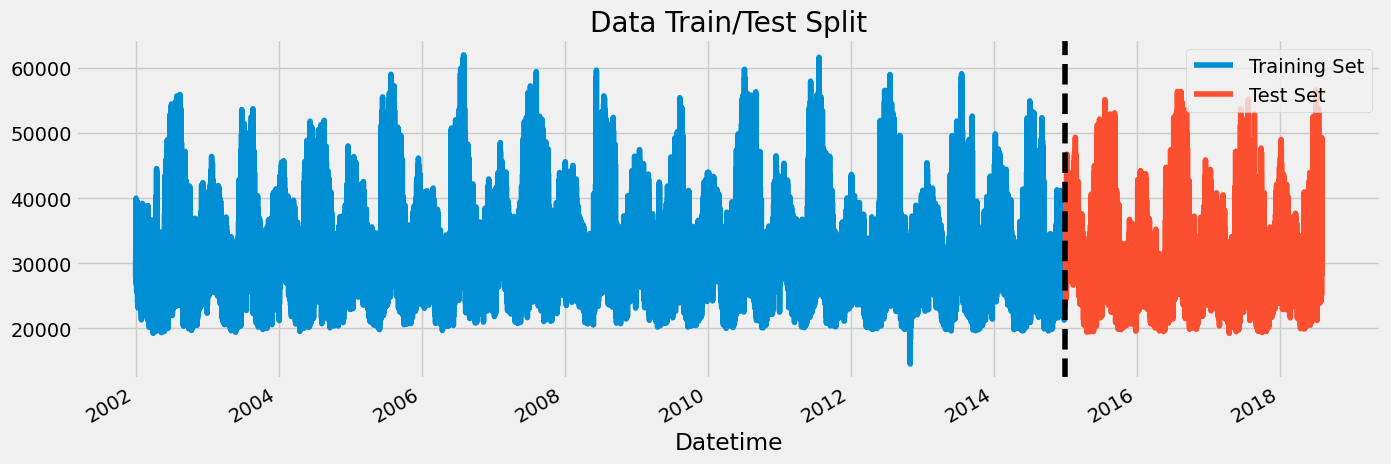

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax,label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

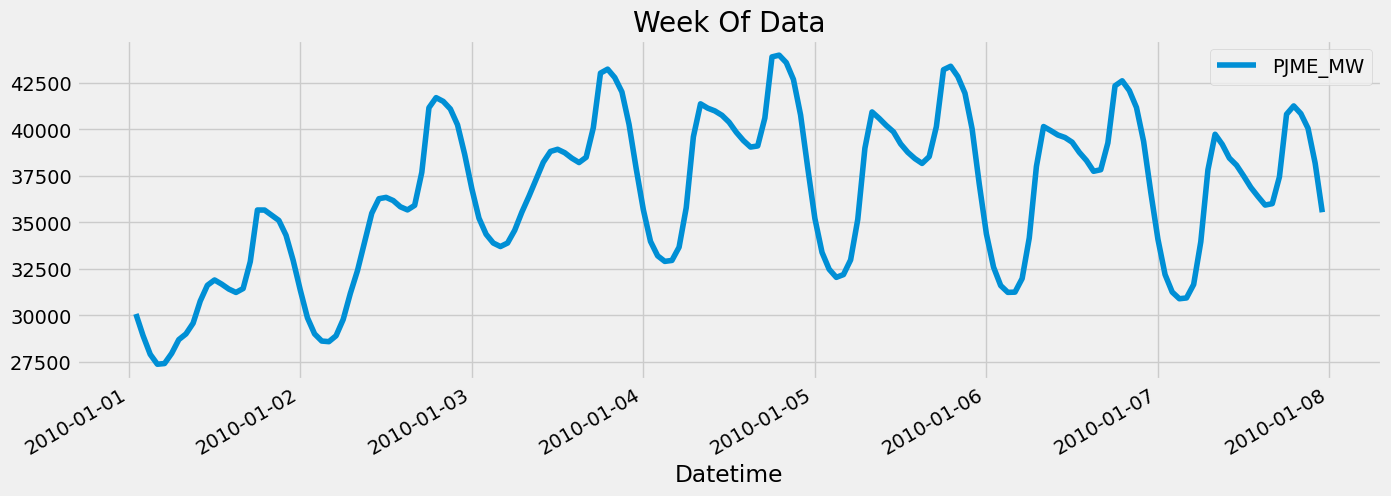

In [10]:
df.loc[(df.index>'01-01-2010')& (df.index<'01-08-2010')].plot(figsize=(15,5),title='Week Of Data')
plt.show()

In [11]:
def create_features(df):
    df=df.copy()
    df['Hour']=df.index.hour
    df['Dayofweek']=df.index.dayofweek
    df['quarter']=df.index.quarter
    df['Month']=df.index.month
    df['Year']=df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week.apply(pd.to_numeric)
    return df
df=create_features(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PJME_MW     145366 non-null  float64
 1   Hour        145366 non-null  int64  
 2   Dayofweek   145366 non-null  int64  
 3   quarter     145366 non-null  int64  
 4   Month       145366 non-null  int64  
 5   Year        145366 non-null  int64  
 6   dayofyear   145366 non-null  int64  
 7   dayofmonth  145366 non-null  int64  
 8   weekofyear  145366 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 11.1 MB


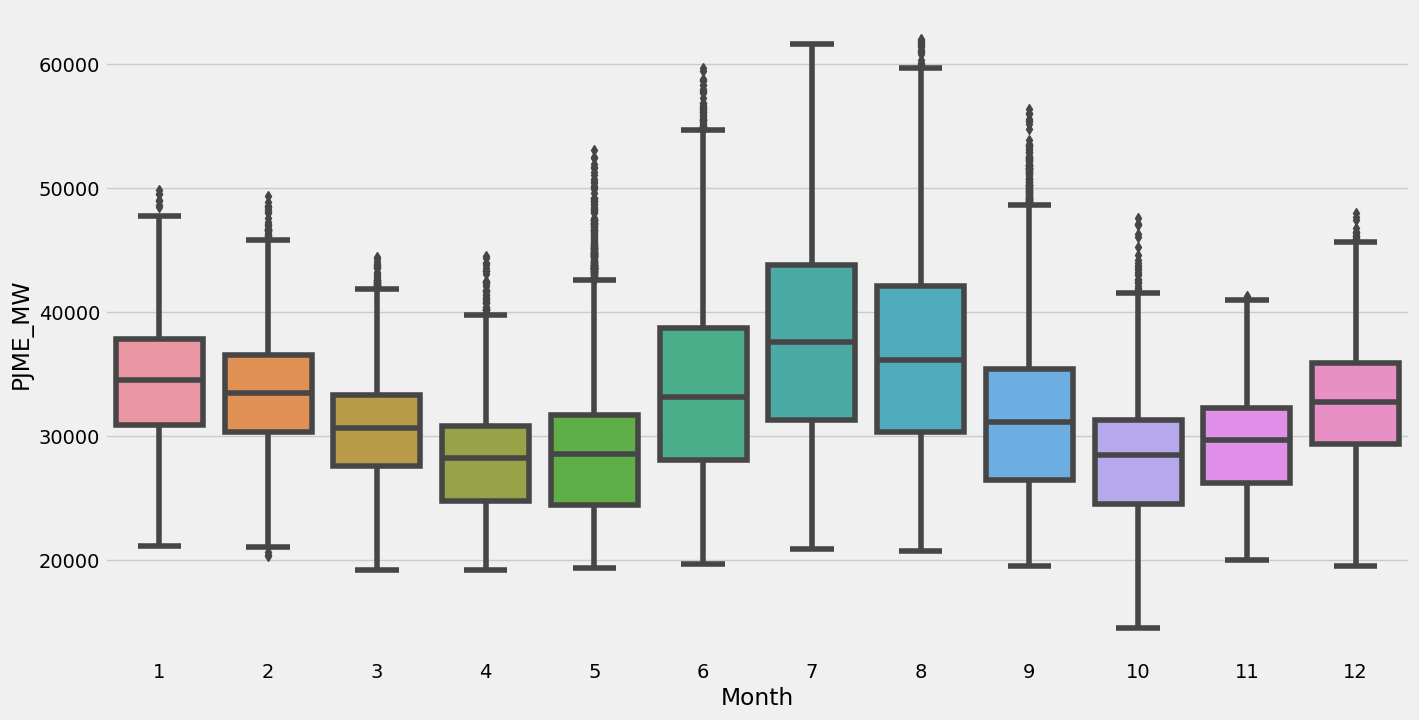

In [13]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df, x='Month', y='PJME_MW')
plt.show()

Create model

In [14]:
train=create_features(train)
test=create_features(test)

In [82]:
#df['weekofyear']=df['weekofyear'].apply(pd.to_numeric)

In [16]:
FEATURES=[ 'Hour', 'Dayofweek', 'quarter', 'Month', 'Year', 'dayofyear','dayofmonth', 'weekofyear']
TARGET='PJME_MW'

x_train=train[FEATURES]
y_train=train[TARGET]

x_test=test[FEATURES]
y_test=test[TARGET]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PJME_MW     145366 non-null  float64
 1   Hour        145366 non-null  int64  
 2   Dayofweek   145366 non-null  int64  
 3   quarter     145366 non-null  int64  
 4   Month       145366 non-null  int64  
 5   Year        145366 non-null  int64  
 6   dayofyear   145366 non-null  int64  
 7   dayofmonth  145366 non-null  int64  
 8   weekofyear  145366 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 11.1 MB


In [18]:
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50, learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:32601.87768	validation_1-rmse:31654.68421
[100]	validation_0-rmse:12341.93512	validation_1-rmse:11516.90737
[200]	validation_0-rmse:5371.61499	validation_1-rmse:5156.86497
[300]	validation_0-rmse:3368.46387	validation_1-rmse:3831.79580
[400]	validation_0-rmse:2872.86038	validation_1-rmse:3713.20489
[439]	validation_0-rmse:2782.09023	validation_1-rmse:3732.25748


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Feature Importance

In [19]:
reg.feature_importances_

array([0.38828853, 0.14085303, 0.02213559, 0.24636918, 0.02052937,
       0.11543918, 0.00984962, 0.05653554], dtype=float32)

In [20]:
fi=pd.DataFrame(data=reg.feature_importances_,
               index=reg.feature_names_in_,
               columns=['importance'])

In [ ]:
fi.head()


<Axes: title={'center': 'feature Importance'}>

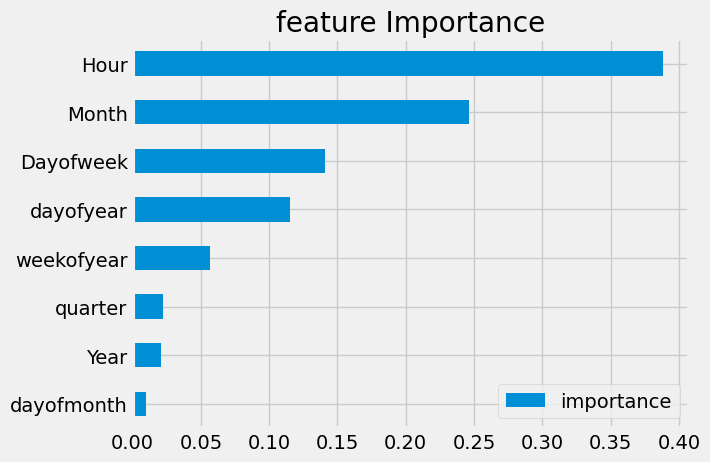

In [107]:
fi.sort_values('importance').plot(kind='barh', title='feature Importance')

Forcasting

In [108]:
test['prediction']=reg.predict(x_test)

In [116]:
df=df.merge(test[['prediction']], how='left', left_index=True, right_index=True )

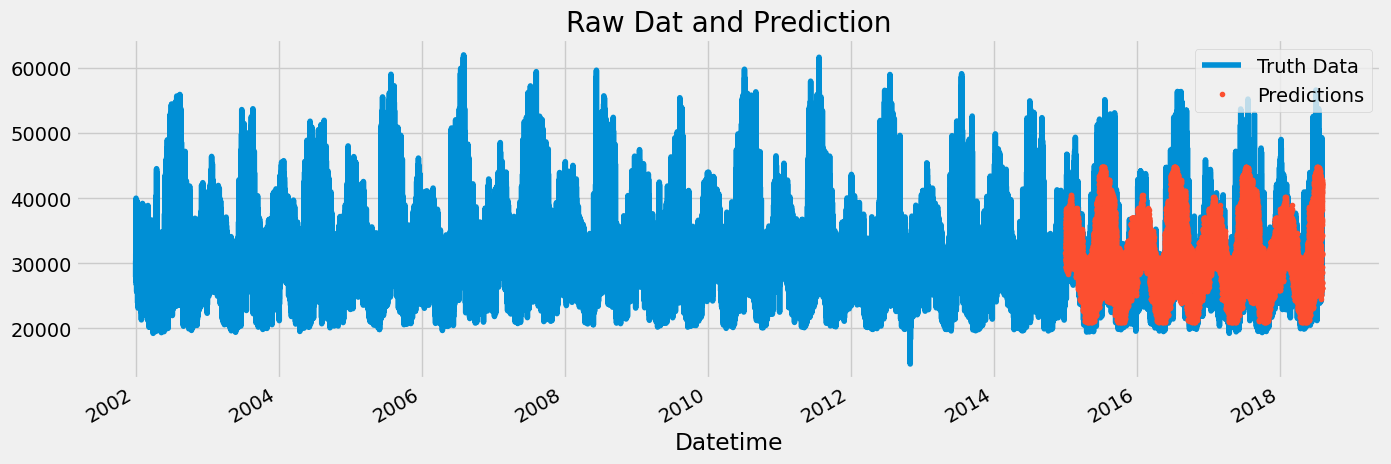

In [117]:
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

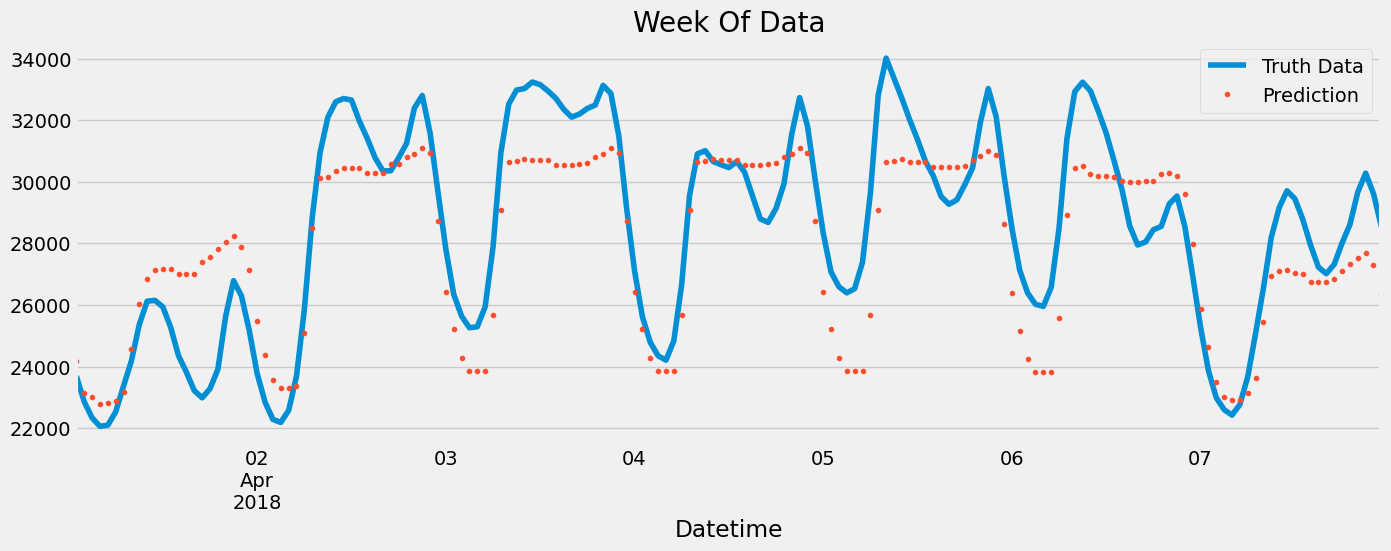

In [118]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [119]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3712.05
